## Harris corner detector:
1. Compute derivatives Ix, Iy and IxIy at each pixel and smooth
them with a Gaussian. (Or smooth first and then derivatives.)
2. Compute the Harris matrix H in a window around each
pixel
3. Compute corner response function R
4.Threshold R

In [ ]:
import numpy as np
from skimage.filters import scharr_h, scharr_v, sobel_h, sobel_v, gaussian
import cv2
import csv
import pandas as pd
# debug:
#import matplotlib
import matplotlib.pyplot as plt
#from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = ( 18 , 8)

In [ ]:
# Takes the path of an imagem sigma , width of the window around pixel, alpha, threshold and the name of the output file 

def harris_corner( path  , sigma , feature_width , alpha , threshold , filename):

    img = cv2.imread(path)
    gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

    #  1. Compute derivatives Ix, Iy and IxIy at each pixel and smooth them with a Gaussian. (Or smooth first and then derivatives.)
    img_gaussian = cv2.GaussianBlur( gray , (3,3) , sigma )
    Ix = cv2.Sobel(img_gaussian, cv2.CV_64F, 1, 0, ksize = 3 )
    Iy = cv2.Sobel(img_gaussian, cv2.CV_64F, 0, 1, ksize = 3 )

    Ixx = gaussian(Ix**2, sigma = 1)
    Ixy = gaussian(Iy*Ix, sigma = 1)
    Iyy = gaussian(Iy**2, sigma = 1)

    # lists to keep the x and y coordinates
    xs = []
    ys = []

    Harris_response = np.zeros(gray.shape)
    rows = gray.shape[0]
    cols = gray.shape[1]

    hfw = int(feature_width/2) # half feature width

    # 2. Compute the Harris matrix H in a window around each pixel
    for i in range(hfw , rows - hfw ,2):
      for j in range(hfw, cols - hfw ,2):
      
        Sxx = np.sum(Ixx[i - hfw : i + 1 + hfw, j - hfw : j  + 1 + hfw])
        Syy = np.sum(Iyy[i - hfw : i + 1 + hfw, j - hfw : j  + 1 + hfw])
        Sxy = np.sum(Ixy[i - hfw : i + 1 + hfw, j - hfw : j + 1 + hfw])

        # constructing the H matrix for the current pixel
        H = np.array([[Sxx,Sxy],[Sxy,Syy]])
        # calculating the determinant of the given matrix 
        det = np.linalg.det(H)
        # calculating the trace 
        trace = np.matrix.trace(H)
        # 3. Compute corner response function R
        R = det - alpha * (trace **2 )
        Harris_response[i - hfw, j - hfw] = R


    cv2.normalize(Harris_response , Harris_response , 0, 1, cv2.NORM_MINMAX)

    # 4.Threshold R
    for i in range(hfw , rows - hfw ):
      for j in range(hfw, cols - hfw):
        r = Harris_response[i, j]
        # 4.Threshold R
        if r > threshold:
          xs.append(i)
          ys.append(j)
          cv2.circle( img , (j,i) , 3 , (0,0,255 )) # draw red dots in place of 


    xs = np.asarray(xs)
    ys = np.asarray(ys)
    #print(xs[0:10])
    #print(ys[0:10])

    # Creating a file with the positions of the corners.
    
    with open(filename, 'w') as csvfile: 
      # creating a csv writer object   
      csvwriter = csv.writer(csvfile) 
      # writing the data rows 
      csvwriter.writerows(zip(xs,ys))
      csvfile.close()

    return img , filename



In [ ]:
# Reading an image 
path = "/content/NotreDame1.jpg"
filename = "corners_locatins.csv"

image , csv_file = harris_corner(path , 1 , 5, 0.04, 0.15 , filename) 


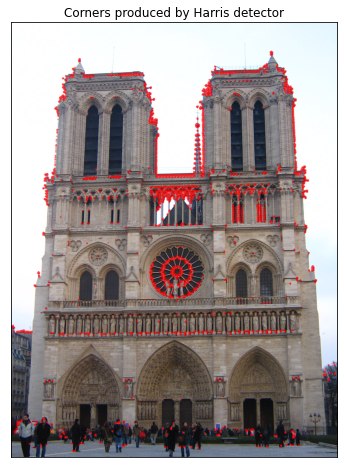

In [ ]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Corners produced by Harris detector")
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
cereal_df = pd.read_csv(csv_file , header = None)
print(cereal_df)

          0     1
0       138  1222
1       138  1224
2       140  1218
3       140  1220
4       140  1222
...     ...   ...
12956  2018   300
12957  2018   302
12958  2020   290
12959  2020   292
12960  2022   758

[12961 rows x 2 columns]
